<a href="https://colab.research.google.com/github/Pushpalatha-H/DL/blob/main/7_Handwritten_Digits_Classification_Usin_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Handwritten Digits Classification using Neural Network

In [32]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [34]:
len(x_train)

60000

In [35]:
len(x_test)

10000

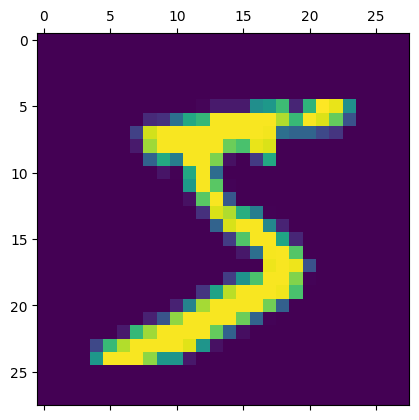

In [36]:
plt.matshow(x_train[0])

In [37]:
x_train.shape

(60000, 28, 28)

In [38]:
x_test.shape

(10000, 28, 28)

In [39]:
# scaling
x_train = x_train/255
y_train = y_train/255

In [40]:
#flatten
x_train_flatten = x_train.reshape(len(x_train), 28*28)

In [41]:
x_test_flatten= x_test.reshape(len(x_test), 28*28)

In [42]:
x_train_flatten.shape

(60000, 784)

**Create simple Neuron Network which has only input and output layers**

In [43]:

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
model.fit(x_train_flatten, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0192 - accuracy: 0.0985


In [45]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 3175.6833 - accuracy: 0.0980


[3175.683349609375, 0.09799999743700027]

In [46]:
y_predicted = model.predict(x_test_flatten)

313/313 [==============================] - 1s 2ms/step


In [47]:
y_predicted_labels= [np.argmax(i) for i in y_predicted]


**Confusion Matrix**

In [48]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

In [49]:
# heatmap
!pip install seaborn

Text(95.72222222222221, 0.5, 'Truth')

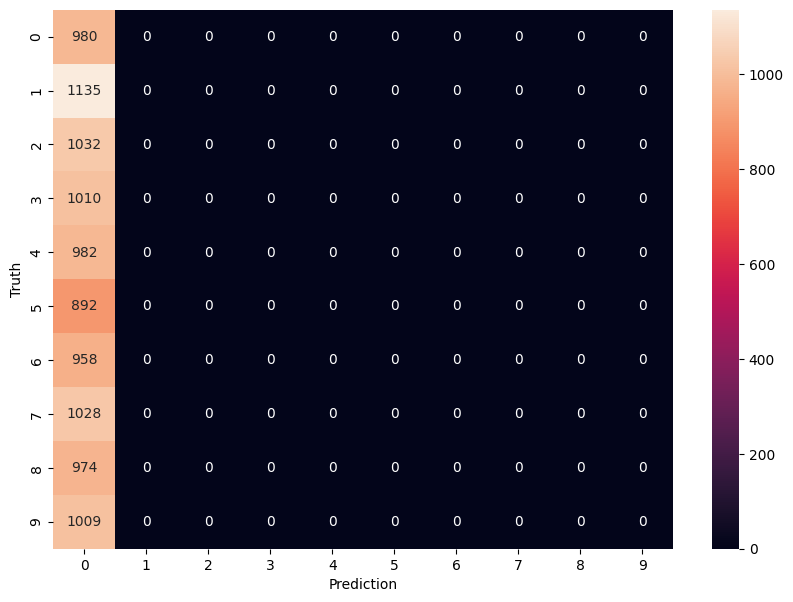

In [50]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Prediction")
plt.ylabel("Truth")


**Using Hidden Layers**

In [51]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_flatten, y_train)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0050 - accuracy: 0.0987


313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

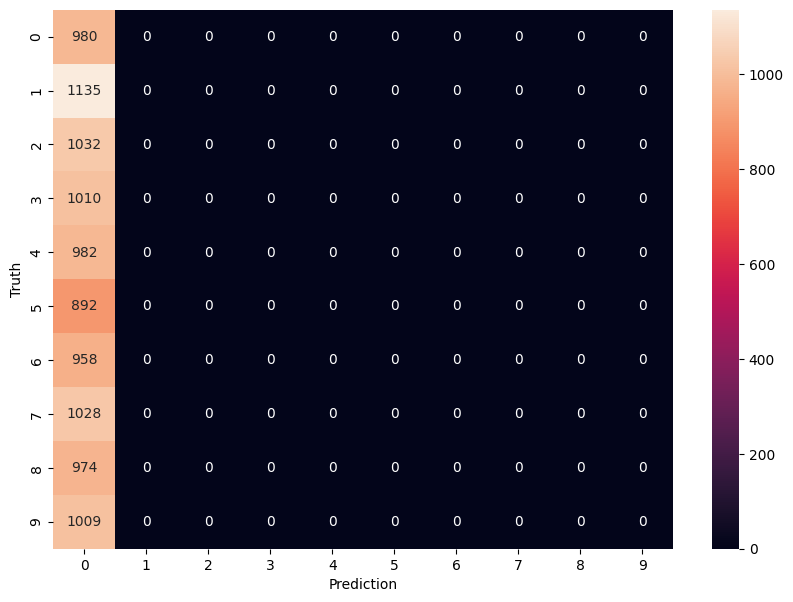

In [52]:
y_predicted = model.predict(x_test_flatten)
y_predict_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Prediction")
plt.ylabel("Truth")

**instead of flattening seperately flatten directly in model**

In [53]:
# instead of flattening seperately flatten directly in model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Dense(100, activation='relu')
])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
model.fit(x_train, y_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0479 - accuracy: 0.0983


In [55]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 13.7422 - accuracy: 0.0980


[13.742207527160645, 0.09799999743700027]